# 사례 연구

### 목적 : 꽃 관련 데이터들을 가지고 KNN 방법을 사용해서 종을 분류하는 모델 만들기


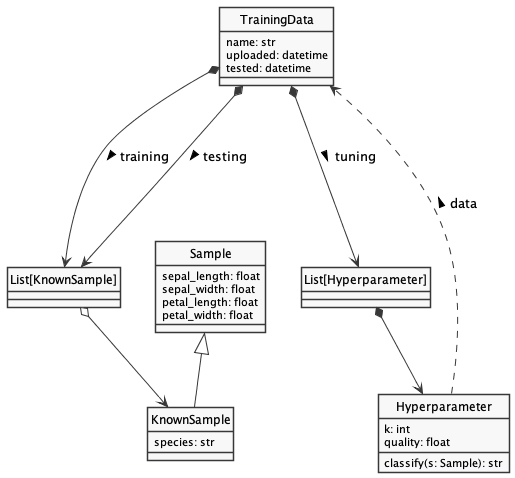

##### 4개의 클래스가 있음
1. TraningData : 총 세개의 리스트, 메타데이터로 구성된 컨테이너
    - 학습용 리스트
    - 테스트용 리스트
    - 하이퍼파라미터 값 리스트
    - 추가적인 메타데이터
        - 작업 데이터 이름
        - 데이터 업로드 일시
        - 테스트  수행 일시
<br><br>
2. Hyperparameter : 하이퍼파라미터 값들 가지고 있음
    - k : 최근접 이웃 관련 하이퍼파라미터
    - k에 따른 테스트 요약
<br><br>
3. Sample : 작업 데이터 가지고 있음 
    - 꽃받침, 꽃잎 길이 너비
<br><br>
4. KnownSample : 추가적인 데이터를 가지고 있은 Sample 
    - 꽃받침, 꽃잎 길이 너비
    - 종류

---------------
#### 파이썬의 Sample 하위클래스 KnownSample에 대한 클래스 정의를 작성해보자

하위클래스를 만들기 전 상위 클래스를 완전히 분해하였는지 확인하자!  
  
Sample은 사실 2가지의 하위클래스를 만들 수 있음 
1. UnknownSample : 사용자가 분류를 요청할 때 사용하는 샘플들
2. KnownSample : 모델 학습 및 테스트에 사용되는 샘플들
  
여기서 UnknownSample들은 분류 요청을 받으면알고리즘에 의해서 분류되고 종을 지정함(상태변경)


> 클래스 디자인을 할 때 좋은 방법 : 개별 샘플의 다양한 상태를 모두 열겨한 뒤, 어떤 다른 클래스가 상태 변경을 담당하는지 생각하기

#### Sample 객체는 어디에서 쓰일까를 생각해보자

1. **초기 로드** : TraningData 객체를 체우기 위해서 load() 메서드가 필요.  
  load() : Sample 객체를 만든 뒤, Known & Unknown 나눈 다음, Known에 대해서는 Test, Training으로 나누는 것까지 해야 할 것 같음!
  
2. **하이퍼 파라미터 테스트** : Hyperparamter 클래스에서는 test() 메서드가 필요, classify() 메서드도 필요
  test() : Sample(Test 속성)은 이 때 특정 하이퍼파라미터를 테스트 하는데 사용이 될 것. 
  
3. **사용자의 분류 요청** : classify() 메서드 필요. Hyperparameter 클래스에 있을수도 있고, TraningData에 있을 수도 있고...
  classify() : Sample(Unknown) 은 이 때 주어진 하이퍼파라미터 모델에 의해서 분류되어질 수 있음. 

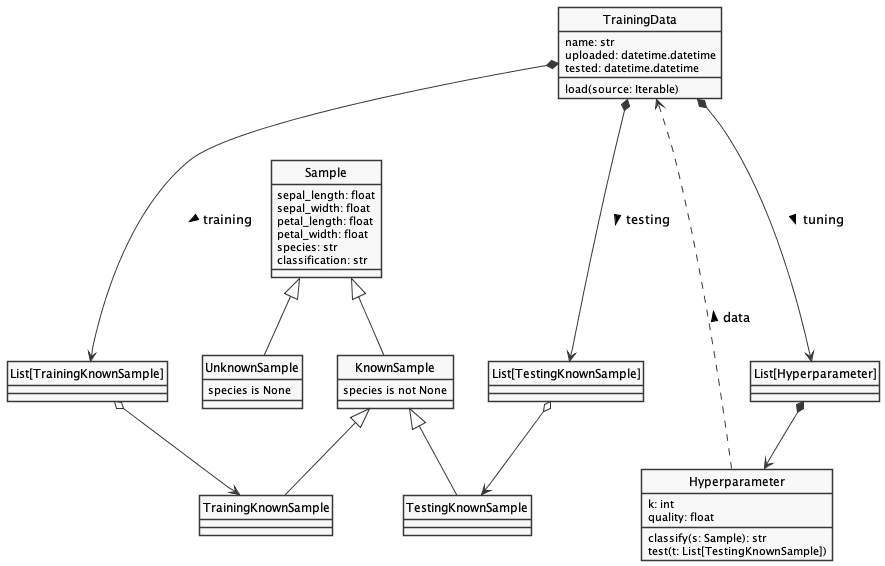

-----------

#### 하나씩 코드를 작성해 봅시다..

#### Sample

In [19]:
from typing import Optional
class Sample:
    def __init__(
        self,
        sepal_length : float,
        sepal_width : float,
        petal_length : float,
        petal_width : float,
        species : Optional[str] = None
    ) -> None:
        self.sepal_length = sepal_length
        self.sepal_width = sepal_width
        self.petal_length = petal_length
        self.petal_width = petal_width
        self.species = species
        self.classification : Optional[str] = None
    
    def __repr__(self) -> str:
        if self.species is None:
            known_unknown = 'UnknownSample'
        else:
            known_unknown = 'KnownSample'
        if self.classification == None:
            classification = ''
        else:
            classification = f", {self.classification}"
        return (
            f"{known_unknown}("
            f"sepal_length={self.sepal_length},"
            f"sepal_width={self.sepal_width},"
            f"petal_length={self.petal_length},"
            f"petal_width={self.petal_width},"
            f"species={self.species!r}"
            f"{classification})"
        )

In [21]:
rose = Sample(1,2,3,4, 'Iris-setosa')
unknown = Sample(2,3,4,1)
rose.classification = 'wrong'
print(rose)
print(unknown)

KnownSample(sepal_length=1,sepal_width=2,petal_length=3,petal_width=4,species='Iris-setosa', wrong)
UnknownSample(sepal_length=2,sepal_width=3,petal_length=4,petal_width=1,species=None)
